In [ ]:
from pylab import *
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import metrics

In [ ]:
########### Données d'Apprentissage et de Test indépendantes pour le SVM ##########

#------- Jeu de données n°1 --------
#--- Apprentissage à partir de 8 exemples de dimension N=2 Feature X=(Mvt,Pouls)
X1 = [[15, 42], [15, 45], [14, 61], [3, 70], [0, 30], [15, 10], [4, 38], [2, 42]]
y1 = [0, 0, 0, 0, 1, 1, 1, 1]


# Données de Test (prédiction)
Lab_reels1 = [0, 1, 1, 1, 0]
#X_test1=[[15., 60.], [2., 42.], [4, 39], [2, 35], [15, 41]]
X_test1=[[15., 60.], [2., 22.], [4, 39], [0, 40], [15, 36]]

#------- Jeu de données n°2 --------
#--- Apprentissage à partir de 16 exemples de dimension N=2 Feature X=(Mvt,Pouls)
X2 = [[15, 42], [15, 41], [14, 61], [3, 70], [13, 40], [14, 43], [11, 65], [3, 70], [0, 58], [15, 37], [4, 38], [2, 42], [2, 59], [13, 33], [5, 38], [0, 35]]
y2 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

# Données de Test (prédiction)
Lab_reels2 = [0, 0, 1, 1, 1, 1, 0, 0]
X_test2=[[15., 60.], [2., 42.], [4, 39], [2, 35], [15, 36], [14, 39], [3, 80], [3, 60]]

#------- Jeu de données n°3 --------
#--- Apprentissage à partir de 16 exemples de dimension N=3 Feature X=(Mvt,Pouls, SpO2)
X3 = [[15, 56, 92], [15, 58, 93], [14, 61, 90], [3, 70, 89], [13, 41, 86], [14, 70, 91], [11, 65, 92], [3, 70, 90], [0, 58, 85], [15, 37, 80], [4, 38, 75], [2, 42, 84], [2, 40, 85], [13, 33, 74], [5, 38, 84], [0, 35, 80]]
y3 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

# Données de Test (prédiction)
Lab_reels3 = [0, 0, 1, 1, 1, 1, 0, 0]
X_test3=[[15., 60., 90.], [2., 42., 89.], [4., 39., 75.], [2., 35., 80.], [15., 36., 82.], [14., 39., 79.], [3., 80., 91.], [3., 60.,93.]]


In [ ]:
# ------ Apprentissage ------
def svm_train(X,y,kernel_type):
  svm_model = svm.SVC(kernel=kernel_type)
  svm_fit = svm_model.fit(X, y)
  # get support vectors
  SV=svm_model.support_vectors_
  print(SV)
  # get indices of support vectors
  Index_SV=svm_model.support_
  print(Index_SV)
  # get number of support vectors for each class
  Number_SV=svm_model.n_support_
  print(Number_SV)
  return svm_fit


# ------ Prediction  (Test) -----
def svm_pred(X_test, Lab_reels, model):
  Lab_pred_lin=model.predict(X_test)
  delta_Lab=Lab_pred_lin - Lab_reels
  print('Erreurs de Kernel :', delta_Lab)
  Nb_erreurs=sum(abs(delta_Lab))
  Taux_erreurs=Nb_erreurs/size(Lab_reels)
  Taux_Reco=(1-Taux_erreurs)*100
  print('Taux_Reco en % :',Taux_Reco)
  print("Accuracy :",metrics.accuracy_score(Lab_reels, Lab_pred_lin))
  return Lab_pred_lin


In [ ]:
# Noyau Linéaire
print('Noyau Linéaire\n')
#------- Jeu de données n°1 --------
print('Jeu de données n°1: \n')
# ------ Apprentissage ------
svm_lin1 = svm_train(X1, y1, 'linear')
# ------ Prediction ------
lin_pred1 = svm_pred(X_test1, Lab_reels1, svm_lin1)
print('\n')

#------- Jeu de données n°2 --------
print('Jeu de données n°2: \n')
# ------ Apprentissage ------
svm_lin2 = svm_train(X2, y2, 'linear')
# ------ Prediction ------
lin_pred2 = svm_pred(X_test2, Lab_reels2, svm_lin2)
print('\n')

#------- Jeu de données n°3 --------
print('Jeu de données n°3: \n')
# ------ Apprentissage ------
svm_lin3 = svm_train(X3, y3, 'linear')
# ------ Prediction ------
lin_pred3 = svm_pred(X_test3, Lab_reels3, svm_lin3)

Noyau Linéaire

Jeu de données n°1: 

[[15. 42.]
 [ 3. 70.]
 [ 4. 38.]]
[0 3 6]
[2 1]
Erreurs de Kernel : [0 0 0 0 0]
Taux_Reco en % : 100.0
Accuracy : 1.0


Jeu de données n°2: 

[[13. 40.]
 [14. 43.]
 [15. 37.]
 [ 2. 59.]
 [13. 33.]]
[ 4  5  9 12 13]
[2 3]
Erreurs de Kernel : [ 0  1  0  0 -1 -1  0  1]
Taux_Reco en % : 50.0
Accuracy : 0.5


Jeu de données n°3: 

[[13. 41. 86.]
 [ 0. 58. 85.]
 [15. 37. 80.]
 [ 5. 38. 84.]]
[ 4  8  9 14]
[1 3]
Erreurs de Kernel : [0 0 0 0 0 0 0 0]
Taux_Reco en % : 100.0
Accuracy : 1.0


In [ ]:
# Noyau RBF (Gaussien)
print('Noyau RBF (Gaussien)\n')
#------- Jeu de données n°1 --------
print('Jeu de données n°1: \n')
# ------ Apprentissage ------
svm_rbf1 = svm_train(X1, y1, 'rbf')
# ------ Prediction ------
rbf_pred1 = svm_pred(X_test1, Lab_reels1, svm_rbf1)
print('\n')

#------- Jeu de données n°2 --------
print('Jeu de données n°2: \n')
# ------ Apprentissage ------
svm_rbf2 = svm_train(X2, y2, 'rbf')
# ------ Prediction ------
rbf_pred2 = svm_pred(X_test2, Lab_reels2, svm_rbf2)
print('\n')

#------- Jeu de données n°3 --------
print('Jeu de données n°3: \n')
# ------ Apprentissage ------
svm_rbf3 = svm_train(X3, y3, 'rbf')
# ------ Prediction ------
rbf_pred3 = svm_pred(X_test3, Lab_reels3, svm_rbf3)

Noyau RBF (Gaussien)

Jeu de données n°1: 

[[15. 42.]
 [15. 45.]
 [14. 61.]
 [ 3. 70.]
 [ 0. 30.]
 [15. 10.]
 [ 4. 38.]
 [ 2. 42.]]
[0 1 2 3 4 5 6 7]
[4 4]
Erreurs de Kernel : [0 0 0 0 1]
Taux_Reco en % : 80.0
Accuracy : 0.8


Jeu de données n°2: 

[[15. 42.]
 [15. 41.]
 [14. 61.]
 [ 3. 70.]
 [13. 40.]
 [14. 43.]
 [ 3. 70.]
 [ 0. 58.]
 [15. 37.]
 [ 4. 38.]
 [ 2. 42.]
 [ 2. 59.]
 [13. 33.]
 [ 5. 38.]]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14]
[7 7]
Erreurs de Kernel : [0 1 0 0 0 0 0 0]
Taux_Reco en % : 87.5
Accuracy : 0.875


Jeu de données n°3: 

[[15. 56. 92.]
 [15. 58. 93.]
 [14. 61. 90.]
 [ 3. 70. 89.]
 [13. 41. 86.]
 [11. 65. 92.]
 [ 3. 70. 90.]
 [ 0. 58. 85.]
 [15. 37. 80.]
 [ 4. 38. 75.]
 [ 2. 42. 84.]
 [ 2. 40. 85.]
 [ 5. 38. 84.]]
[ 0  1  2  3  4  6  7  8  9 10 11 12 14]
[7 6]
Erreurs de Kernel : [0 1 0 0 0 0 0 0]
Taux_Reco en % : 87.5
Accuracy : 0.875


In [ ]:
# Noyau Polynomial
print('Noyau Polynomial\n')
#------- Jeu de données n°1 --------
print('Jeu de données n°1: \n')
# ------ Apprentissage ------
svm_poly1 = svm_train(X1, y1, 'poly')
# ------ Prediction ------
poly_pred1 = svm_pred(X_test1, Lab_reels1, svm_poly1)
print('\n')

#------- Jeu de données n°2 --------
print('Jeu de données n°2: \n')
# ------ Apprentissage ------
svm_poly2 = svm_train(X2, y2, 'poly')
# ------ Prediction ------
poly_pred2 = svm_pred(X_test2, Lab_reels2, svm_poly2)
print('\n')

#------- Jeu de données n°3 --------
print('Jeu de données n°3: \n')
# ------ Apprentissage ------
svm_poly3 = svm_train(X3, y3, 'poly')
# ------ Prediction ------
poly_pred3 = svm_pred(X_test3, Lab_reels3, svm_poly3)

Noyau Polynomial

Jeu de données n°1: 

[[15. 42.]
 [ 4. 38.]
 [ 2. 42.]]
[0 6 7]
[1 2]
Erreurs de Kernel : [0 0 0 0 0]
Taux_Reco en % : 100.0
Accuracy : 1.0


Jeu de données n°2: 

[[15. 41.]
 [13. 40.]
 [14. 43.]
 [ 3. 70.]
 [15. 37.]
 [ 2. 59.]
 [13. 33.]
 [ 5. 38.]]
[ 1  4  5  7  9 12 13 14]
[4 4]
Erreurs de Kernel : [ 0  1  0  0 -1 -1  0  0]
Taux_Reco en % : 62.5
Accuracy : 0.625


Jeu de données n°3: 

[[ 3. 70. 89.]
 [13. 41. 86.]
 [ 0. 58. 85.]
 [15. 37. 80.]]
[3 4 8 9]
[2 2]
Erreurs de Kernel : [0 1 0 0 0 0 0 0]
Taux_Reco en % : 87.5
Accuracy : 0.875


# Question 6

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

# fonction pour représenter l’hyperplan séparateur à vaste marge en 2-dimension
def seperate_hyperlane_2d(X, y, clf):

    X = np.asarray(X)
    plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
        ax=ax,
    )
    # plot support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.show()

In [ ]:
# fonction pour représenter l’hyperplan séparateur en 3-dimension
from mpl_toolkits.mplot3d import Axes3D
def seperate_hyperlane_3d(X, y, clf):
    # Extract the coefficients of the hyperplane equation
    w = clf.coef_[0]
    b = clf.intercept_

    X = np.asarray(X)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

    # Define the range of the plot axes
    xx, yy = np.meshgrid(np.linspace(0, 100, 20), np.linspace(0, 100, 20))
    zz = (-w[0]*xx - w[1]*yy - b) / w[2]

    # Plot the hyperplane
    ax.plot_surface(xx, yy, zz, alpha=0.2)

    # Set the labels for the plot axes
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')

    # Show the plot
    plt.show()

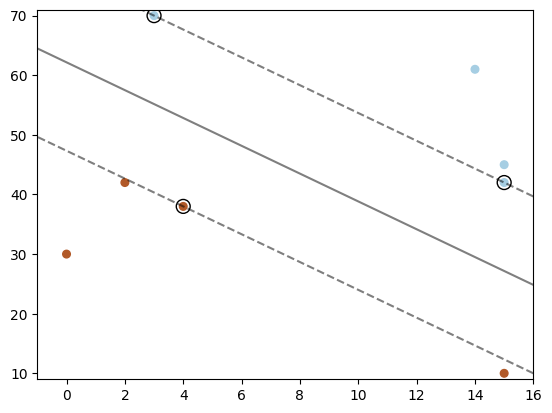

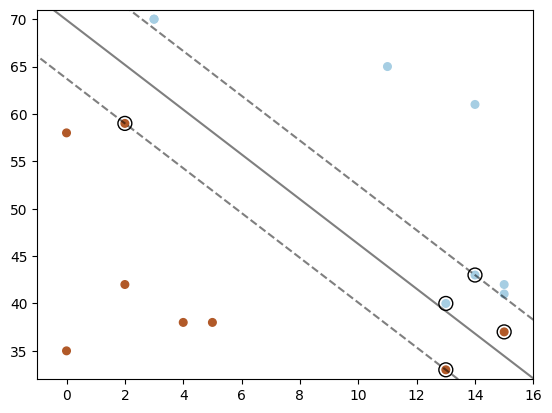

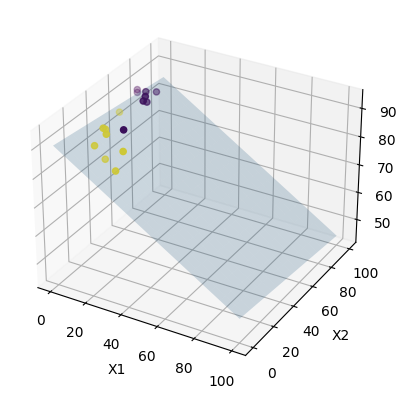

In [ ]:
## SVM avec le noyau Linéaire
# Jeu de données n°1
seperate_hyperlane_2d(X1, y1, svm_lin1)

# Jeu de données n°2
seperate_hyperlane_2d(X2, y2, svm_lin2)

# Jeu de données n°3
seperate_hyperlane_3d(X3, y3, svm_lin3)

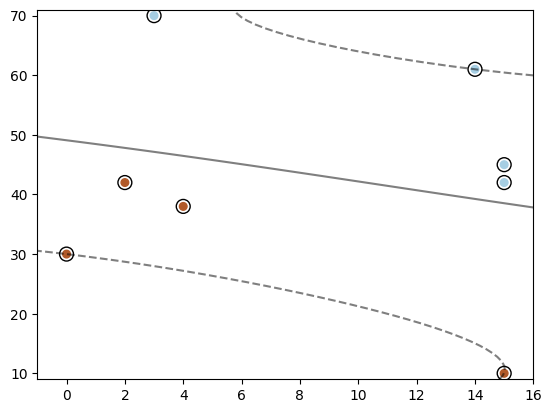

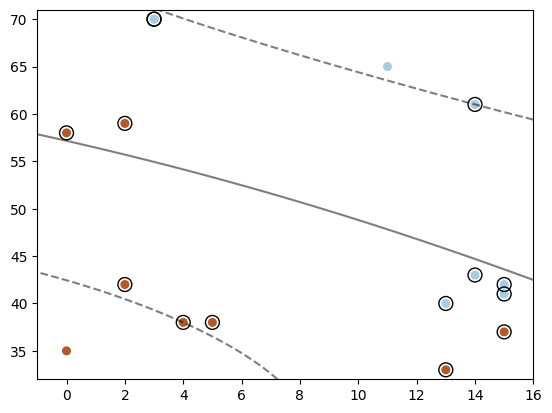

In [ ]:
## SVM avec le noyau RBF
# Jeu de données n°1
seperate_hyperlane_2d(X1, y1, svm_rbf1)

# Jeu de données n°2
seperate_hyperlane_2d(X2, y2, svm_rbf2)

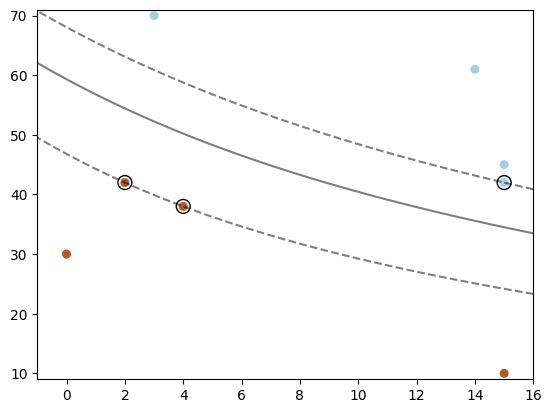

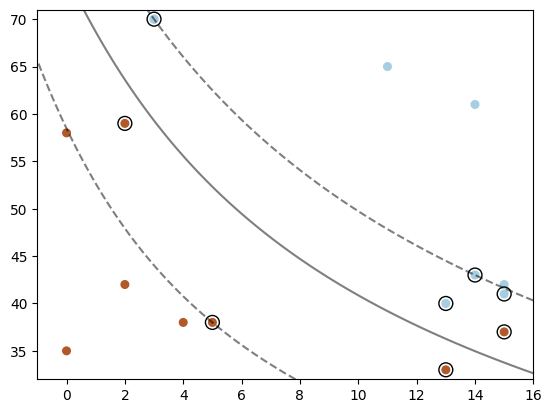

In [ ]:
## SVM avec le noyau polynomial
# Jeu de données n°1
seperate_hyperlane_2d(X1, y1, svm_poly1)

# Jeu de données n°2
seperate_hyperlane_2d(X2, y2, svm_poly2)